# Session 3: Python Data Analysis World

Python has a very strong community in the data analytics and scientific computing world. There are a lot of great Python packages to support different analyses, but there are a few very key packages:

* Workhorses - numpy, pandas, scipy
* Spatial tools - shapely, ogr/gdal, geopandas, etc
* Environments and Visualisation - Jupiter, matplotlib

You will all of these after installing Anaconda and installing the additional packages described in Session 0. (The additional packages relate to spatial analysis - you can skip them if you don't need them)

Where possible, veneer-py functions will accept and return objects that are directly usable by these packages. In particular, time series and other tabular data structures are returned as pandas DataFrame objects.

This session gives very brief introductions to most of these packages. In most cases, the links in Session 0 are relevant for more information.

## numpy

numpy represents multi-dimensional arrays and operations on those arrays. The arrays are typed (eg float, double precision float, integer, etc) and are indexed by integers (one per dimension).

In veneer-py, we use pandas Data Frames more than numpy arrays, but the basics of the array operations in numpy are the foundations on which pandas is built.

You can create an array of random numbers using functions under the `np.random` namespace. The following example creates 100 random floats using a normal distribution

**Note:** numpy is typically imported as `np`.


In [3]:
import numpy as np
random = np.random.normal(size=100)
random

array([-0.32846804,  0.24233466,  0.56216504,  1.61970292,  1.61387102,
       -0.20260723,  0.40419901,  1.04339317, -0.04147032, -0.23362834,
       -0.33834912, -0.3403258 , -0.92226102,  0.93534043,  1.34859119,
       -2.00442134, -0.44725056,  0.87007699, -1.05769217, -0.64963042,
        0.44078006, -1.27336806,  2.04514494, -0.48511948, -0.47662417,
       -0.82265906, -2.30960877, -0.61543794,  0.81831407, -0.13247048,
        0.33658916,  0.98143053,  0.90600701, -1.26208505,  0.53828062,
        0.95511353, -0.50796315,  1.20768909, -0.65747147,  1.29378467,
       -0.99321247,  0.05004184,  0.64125027, -0.33449546,  1.61972184,
        0.56414875, -1.05181545, -0.6281049 , -0.25006024, -0.40256336,
        0.60213267, -0.44373157, -1.1478386 , -0.10437203,  0.17834442,
       -0.70958483, -1.76063764, -0.30497265,  0.75522514, -0.29467826,
        0.67125189,  1.17539477,  0.98764732, -0.35971512, -0.33272206,
        1.44759658, -0.6425866 , -2.64347229,  0.84533837,  0.94

The functions in `np.random` return one dimensional arrays. You can check this with `.shape` and change it with `.reshape()`

In [4]:
random.shape

(100,)

In [6]:
threed = random.reshape(10,5,2)
threed

array([[[-0.32846804,  0.24233466],
        [ 0.56216504,  1.61970292],
        [ 1.61387102, -0.20260723],
        [ 0.40419901,  1.04339317],
        [-0.04147032, -0.23362834]],

       [[-0.33834912, -0.3403258 ],
        [-0.92226102,  0.93534043],
        [ 1.34859119, -2.00442134],
        [-0.44725056,  0.87007699],
        [-1.05769217, -0.64963042]],

       [[ 0.44078006, -1.27336806],
        [ 2.04514494, -0.48511948],
        [-0.47662417, -0.82265906],
        [-2.30960877, -0.61543794],
        [ 0.81831407, -0.13247048]],

       [[ 0.33658916,  0.98143053],
        [ 0.90600701, -1.26208505],
        [ 0.53828062,  0.95511353],
        [-0.50796315,  1.20768909],
        [-0.65747147,  1.29378467]],

       [[-0.99321247,  0.05004184],
        [ 0.64125027, -0.33449546],
        [ 1.61972184,  0.56414875],
        [-1.05181545, -0.6281049 ],
        [-0.25006024, -0.40256336]],

       [[ 0.60213267, -0.44373157],
        [-1.1478386 , -0.10437203],
        [ 0.178344

You can perform basic arithmetic on arrays, using scalars or other arrays.

For example, given the following two arrays

In [7]:
a1 = np.array([20.0,12.0,77.0,77.0])
a2 = np.array([25.0,6.0,80.0,80.0])

In [8]:
# You can add:

a1 + a2

array([  45.,   18.,  157.,  157.])

In [9]:
# Multiply (element wise):

a1 * a2

array([  500.,    72.,  6160.,  6160.])

In [10]:
# Compute a dot product

a1.dot(a2)

12892.0

In [17]:
# You can also perform matrix operations
# First tell numpy that your array is a matrix,
# Then transpose to compatible shapes
# Then multiply
np.matrix(a1).transpose() * np.matrix(a2)

matrix([[  500.,   120.,  1600.,  1600.],
        [  300.,    72.,   960.,   960.],
        [ 1925.,   462.,  6160.,  6160.],
        [ 1925.,   462.,  6160.,  6160.]])

## pandas

Pandas DataFrame objects are one of the key data types used in veneer-py.

A DataFrame is a tabular, two-dimensional data structure, which can be indexed in a range of ways, including a date and date/time index. DataFrames are aranged in named columns, each with a particular type (eg double, string, integer) and in this sense they are more flexible than numpy arrays.

Each column in a DataFrame is a pandas Series, which is useful in its own right.

In [20]:
import veneer
v = veneer.Veneer(port=9876)
downstream_flow_vol = v.retrieve_multiple_time_series(criteria={'RecordingVariable':'Downstream Flow Volume'})

*** /runs/latest ***
*** /runs/1/location/Default Link 4/element/Downstream Flow Volume/variable/Downstream Flow Volume ***
*** /runs/1/location/SR2/element/Downstream Flow Volume/variable/Downstream Flow Volume ***
*** /runs/1/location/SR3/element/Downstream Flow Volume/variable/Downstream Flow Volume ***
*** /runs/1/location/Default Link 5/element/Downstream Flow Volume/variable/Downstream Flow Volume ***
*** /runs/1/location/Ungauged Inflow/element/Downstream Flow Volume/variable/Downstream Flow Volume ***
*** /runs/1/location/Storage/element/Downstream Flow Volume/variable/Downstream Flow Volume ***
*** /runs/1/location/SP/element/Downstream Flow Volume/variable/Downstream Flow Volume ***
*** /runs/1/location/MFR/element/Downstream Flow Volume/variable/Downstream Flow Volume ***
*** /runs/1/location/Water User/element/Downstream Flow Volume/variable/Downstream Flow Volume ***
*** /runs/1/location/End Of System/element/Downstream Flow Volume/variable/Downstream Flow Volume ***


Pandas DataFrames have a tabular presentation in the Jupyter notebook.

It's also possible to _slice_ subsets of rows

In [22]:
downstream_flow_vol[0:10] # <-- Look at first 10 rows (timesteps)

,Default Link #4:Downstream Flow Volume,Default Link #5:Downstream Flow Volume,End Of System:Downstream Flow Volume,MFR:Downstream Flow Volume,SP:Downstream Flow Volume,SR2:Downstream Flow Volume,SR3:Downstream Flow Volume,Storage:Downstream Flow Volume,Ungauged Inflow:Downstream Flow Volume,Water User:Downstream Flow Volume
1901-01-01,0.000000,514.15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,514.15,0
1901-01-02,0.000000,483.35,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,483.35,0
1901-01-03,6349.027111,1815.10,6349.027111,6349.027111,6349.027111,6349.027111,6349.027111,6349.027111,1815.10,0
1901-01-04,0.000000,2857.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2857.05,0
1901-01-05,0.000000,2763.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2763.25,0
1901-01-06,316601.314118,11478.60,316601.314118,316601.314118,316601.314118,316601.314118,316601.314118,316601.314118,11478.60,0
1901-01-07,0.000000,8350.30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8350.30,0
1901-01-08,0.000000,5412.40,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5412.40,0
1901-01-09,0.000000,3761.10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3761.10,0
1901-01-10,0.000000,2825.20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2825.20,0


In [27]:
downstream_flow_vol[0::3000] # <-- Look at every 3000th timestep

,Default Link #4:Downstream Flow Volume,Default Link #5:Downstream Flow Volume,End Of System:Downstream Flow Volume,MFR:Downstream Flow Volume,SP:Downstream Flow Volume,SR2:Downstream Flow Volume,SR3:Downstream Flow Volume,Storage:Downstream Flow Volume,Ungauged Inflow:Downstream Flow Volume,Water User:Downstream Flow Volume
1901-01-01,0.0,514.15,0.0,0.0,0.0,0.0,0.0,0.0,514.15,0
1909-03-20,0.0,397.60,0.0,0.0,0.0,0.0,0.0,0.0,397.60,0
1917-06-06,0.0,3583.30,0.0,0.0,0.0,0.0,0.0,0.0,3583.30,0
1925-08-23,0.0,23529.80,0.0,0.0,0.0,0.0,0.0,0.0,23529.80,0
1933-11-09,0.0,2212.35,0.0,0.0,0.0,0.0,0.0,0.0,2212.35,0
1942-01-26,0.0,807.80,0.0,0.0,0.0,0.0,0.0,0.0,807.80,0
1950-04-14,0.0,1311.80,0.0,0.0,0.0,0.0,0.0,0.0,1311.80,0
1958-07-01,0.0,11866.05,0.0,0.0,0.0,0.0,0.0,0.0,11866.05,0
1966-09-17,0.0,4036.90,0.0,0.0,0.0,0.0,0.0,0.0,4036.90,0
1974-12-04,0.0,947.45,0.0,0.0,0.0,0.0,0.0,0.0,947.45,0


You can quickly get stats for each column in a DataFrame

In [29]:
downstream_flow_vol.mean()

Default Link #4:Downstream Flow Volume     377.669594
Default Link #5:Downstream Flow Volume    5315.220367
End Of System:Downstream Flow Volume       377.669594
MFR:Downstream Flow Volume                 377.669594
SP:Downstream Flow Volume                  377.669594
SR2:Downstream Flow Volume                 377.669594
SR3:Downstream Flow Volume                 377.669594
Storage:Downstream Flow Volume             377.669594
Ungauged Inflow:Downstream Flow Volume    5315.220367
Water User:Downstream Flow Volume            0.000000
dtype: float64

You can get the same stats along rows:

In [31]:
downstream_flow_vol.mean(axis=1)

1901-01-01       102.830000
1901-01-02        96.670000
1901-01-03      4807.338978
1901-01-04       571.410000
1901-01-05       552.650000
1901-01-06    223916.639883
1901-01-07      1670.060000
1901-01-08      1082.480000
1901-01-09       752.220000
1901-01-10       565.040000
1901-01-11       457.520000
1901-01-12       394.310000
1901-01-13       355.810000
1901-01-14       331.100000
1901-01-15       314.230000
1901-01-16       301.700000
1901-01-17       291.690000
1901-01-18      1587.390000
1901-01-19      1158.920000
1901-01-20       810.810000
1901-01-21       613.340000
1901-01-22       499.730000
1901-01-23       432.740000
1901-01-24       391.860000
1901-01-25       365.470000
1901-01-26       347.270000
1901-01-27       333.690000
1901-01-28       322.770000
1901-01-29       313.390000
1901-01-30       304.990000
                  ...      
2013-12-02       297.430000
2013-12-03       290.290000
2013-12-04       283.360000
2013-12-05       276.500000
2013-12-06       269

## Spatial tools



## Jupyter and visualisation

It is worth spending some time exploring the capabilities of the Jupyter notebook.

In terms of managing your work:

* The **Edit** and **Insert** menus have useful functions for rearranging cells, creating new cells, etc
* The **Cell** menu has functions for running all cells in a notebook, all cells above a particular point and all cells below a point.
* The **Kernel** menu controls the execution and lifecycle of the Python session. (In this instance, Kernel refers to an instance of an IPython session that is connected to the notebook. The **Restart** command clears all variables - even though earlier output is still visible in the notebook)


At this stage, most visualisation in Python notebooks is handled by matplotlib.

Matplotlib is powerful, but the learning curve can be steep.

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

Typically, you'll create a single plot from a single cell

(array([  12.,   28.,   67.,   95.,  100.,   94.,   68.,   19.,   13.,    4.]),
 array([-2.56560177, -1.99247094, -1.41934011, -0.84620928, -0.27307845,
         0.30005238,  0.87318321,  1.44631404,  2.01944487,  2.5925757 ,
         3.16570653]),
 <a list of 10 Patch objects>)

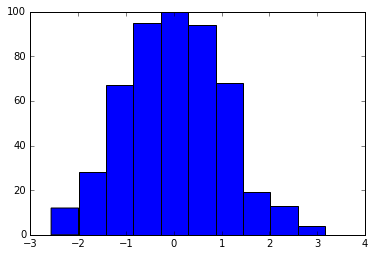

In [40]:
plt.hist(np.random.normal(size=500))

... But the matplotlib subplots functionality allows you to create matrices of plots.

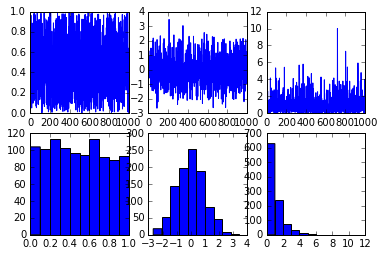

In [51]:
methods=[np.random.uniform,np.random.normal,np.random.exponential]

n=len(methods)

# Create n sets of random numbers, where n is the number of methods specified
random_sets = [method(size=1000) for method in methods]

for i in range(n):
    # Arrange subplots 2 rows x 3 columns
    # Access the i'th column on the first row
    ax = plt.subplot(2,3,i+1)
    # Plot the random numbers
    ax.plot(random_sets[i])
    # Access the i'th column on the second row
    ax = plt.subplot(2,3,n+i+1)
    # Plot a histogram of the corresponding numbers
    ax.hist(random_sets[i])